# Week4 - Homework 2

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/airbnb_nyc_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Question 1:
### Which features can we use?

In [2]:
#sampling the data 
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38765,30393286,"Gorgeous 2BR, 2BA, Pool + Doorman, near Times ...",107434423,Blueground,Manhattan,Hell's Kitchen,40.76046,-73.99685,Entire home/apt,416,30,0,NaN,NaN,232,335
27286,21550242,ENTIRE Apt in Williamsburg < 1 block to L train,1913749,Kelly,Brooklyn,Williamsburg,40.71259,-73.94189,Entire home/apt,125,4,11,2019-06-24,0.55,1,11
42032,32663202,Cozy Chelsea Apartment,64433748,Abby,Manhattan,Chelsea,40.74855,-74.00074,Shared room,65,1,19,2019-06-30,4.45,1,208
12375,9544914,"King Bed, Private Room in Crown Heights, Comedian",22423049,Abraham,Brooklyn,Crown Heights,40.67157,-73.94117,Private room,36,2,100,2017-07-31,2.28,1,0
44051,34014432,"Cozy , clean and comfortable",125755479,Carla,Queens,Astoria,40.76398,-73.91409,Private room,100,1,0,NaN,NaN,1,0


In [3]:
#checking null values using isna 
df.isna().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
#checking column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Reason:
1. Features chosen 'neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','latitude', 'longitude','reviews_per_month','availability_365'
2. These are some major factors that contribute to rate for example if I am staying in Manhattan, West Village and Bronx, Mott Haven. The price differs significantly
3. Room type, Minimum nights reviews and availability are something that are primarily taken in consideration before booking.
4. On the contrary, We do not care about who the host is and their id etc.
5. Also did not consider Last review as people see overall reviews and not just the last

In [5]:
from sklearn.model_selection import train_test_split
features = [
    'neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','latitude', 'longitude','reviews_per_month','availability_365'
]

#using features to predict prices
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 39,116
Records in test data: 9,779

Features:
neighbourhood_group
neighbourhood
room_type
minimum_nights
number_of_reviews
latitude
longitude
reviews_per_month
availability_365


In [6]:
#checking features
df[features]

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,latitude,longitude,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,1,9,40.64749,-73.97237,0.21,365
1,Manhattan,Midtown,Entire home/apt,1,45,40.75362,-73.98377,0.38,355
2,Manhattan,Harlem,Private room,3,0,40.80902,-73.94190,NaN,365
3,Brooklyn,Clinton Hill,Entire home/apt,1,270,40.68514,-73.95976,4.64,194
4,Manhattan,East Harlem,Entire home/apt,10,9,40.79851,-73.94399,0.10,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,2,0,40.67853,-73.94995,NaN,9
48891,Brooklyn,Bushwick,Private room,4,0,40.70184,-73.93317,NaN,36
48892,Manhattan,Harlem,Entire home/apt,10,0,40.81475,-73.94867,NaN,27
48893,Manhattan,Hell's Kitchen,Shared room,1,0,40.75751,-73.99112,NaN,2


In [7]:
#checking data types to segregate categorical and numeric vals
df[features].dtypes

neighbourhood_group     object
neighbourhood           object
room_type               object
minimum_nights           int64
number_of_reviews        int64
latitude               float64
longitude              float64
reviews_per_month      float64
availability_365         int64
dtype: object

## Question 2: 
Split the features into two lists, one for the numerical features and another for the categorical features.

In [8]:
#splitting based on dtype
Cat_Val= ['neighbourhood_group','neighbourhood','room_type']
Num_Val = ["minimum_nights","number_of_reviews","latitude",'longitude',"reviews_per_month"
,"availability_365"]

## Question 3: 
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#using a pipeline instance to impute values using median 
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    #Using StandardScaler to standardize
    ('scaler', StandardScaler())  
])

## Question 4: 
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [10]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  #  dropping one category , and ignoring new categories
])

X_train_cat = cat_pipeline.fit_transform(X_train[Cat_Val])

# the number of columns in the transformed data. These have increased because of one hot encoding
num_columns = X_train_cat.shape[1]


print(num_columns)

# Calculating the unique values in each categorical column
unique_neighbourhood_group = X_train['neighbourhood_group'].nunique()
unique_neighbourhood = X_train['neighbourhood'].nunique()
unique_room_type = X_train['room_type'].nunique()

224


## Question 5: 

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [26]:

from sklearn.compose import ColumnTransformer

# Combining numerical and categorical pipelines into one ColumnTransformer
combined = ColumnTransformer([
    ('num', num_pipeline, Num_Val),  
    ('cat', cat_pipeline, Cat_Val)
])

# Fitting the combined pipeline on the training data
X_train_combined = combined.fit_transform(X_train)


In [27]:
# Checking if the data is a sparse matrix and convert to dense/ array form 
if hasattr(X_train_combined, "toarray"):
    X_train_combined_dense = X_train_combined.toarray()
else:
    X_train_combined_dense = X_train_combined


In [28]:
# Checking if we have any null values
has_missing_values = np.any(pd.isnull(X_train_combined_dense))


num_columns_total = X_train_combined_dense.shape[1]

# Output the results
print(f"missing values: {has_missing_values}")
print(f"Number of columns: {num_columns_total}")
print(combined)

missing values: False
Number of columns: 230
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['minimum_nights', 'number_of_reviews',
                                  'latitude', 'longitude', 'reviews_per_month',
                                  'availability_365']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['neighbourhood_group

## Question 6: 

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# # Combine numerical and categorical pipelines into one ColumnTransformer
# combined = ColumnTransformer([
#     ('num', num_pipeline, Num_Val),  
#     ('cat', cat_pipeline, Cat_Val)
# ])

#  adding a Linear Regression model at the end
full_pipeline = Pipeline([
    ('preprocessor', combined),  # Combining numerical and categorical pipelines
    ('model', LinearRegression())  # Adding Linear Regression model
])

# fitting pipeline on the training data
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'latitude', 'longitude',
                                                   'reviews_per_month',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['neighbourhood_group',
                                                   'neighbourhood',
                                                   'room_type'])])),
                ('model', LinearRegression())])

In [30]:
# predictions on the test data
y_pred = full_pipeline.predict(X_test)

# the R^2 score on the test data 
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2:.4f}")

R^2 score: 0.1035


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Interpretation:
This model does not seem to capture the details of the data and the prediction does not seem accurate. And this requires much changes

## Question 7: 

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:122: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = method(scout_x, scout_y, **kws)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\relational.py:573: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


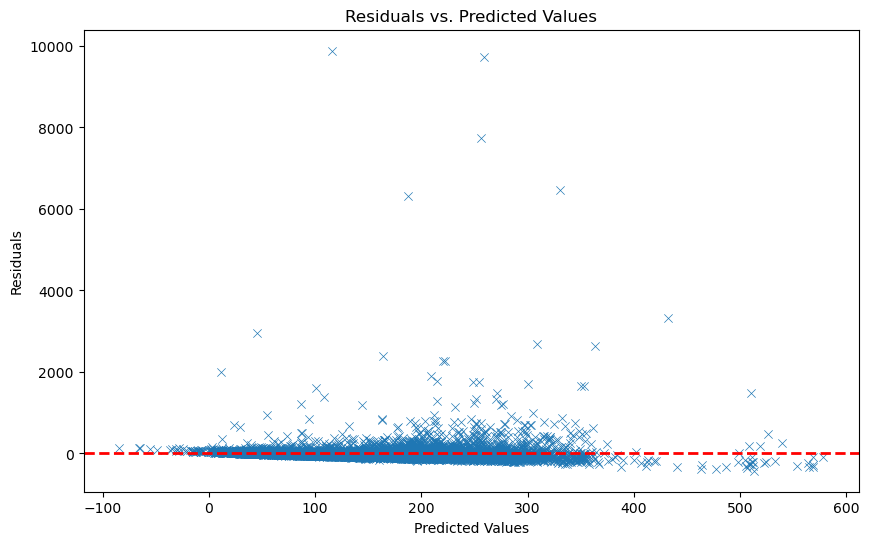

<Figure size 640x480 with 0 Axes>

In [19]:
# Calculating residuals
residuals = y_test - y_pred

#  residual scatter plot (Residuals vs. Predicted Values)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, edgecolor='w', marker='x')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
plt.tight_layout()


# Interpretation:
1. The residual shows some concentration near zero but a significant residual can be noticed going over 0
2. This shows that the variance is not constant
3. The model is not accurately predicting the values mostly as the predicted values increase

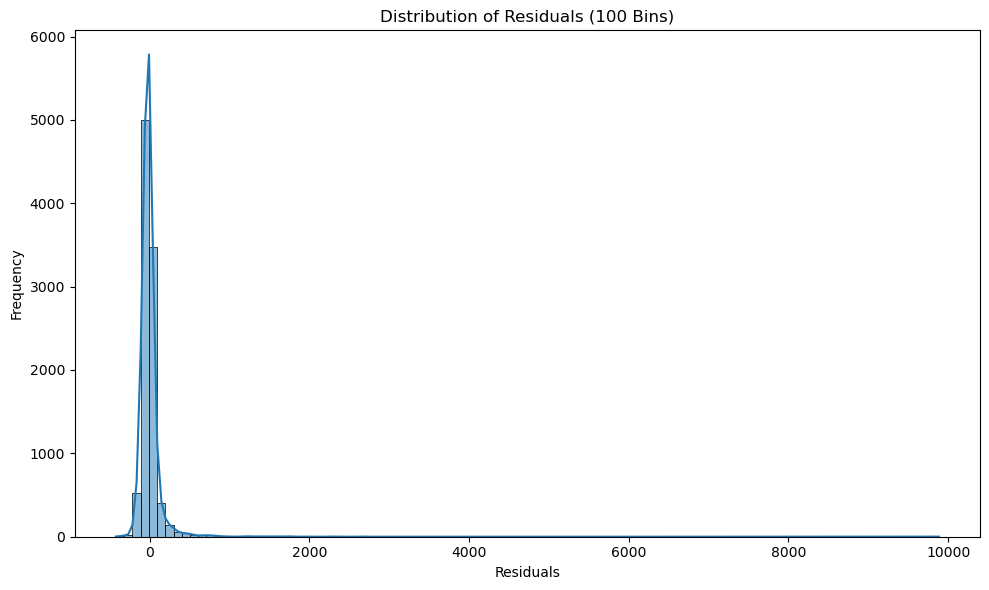

In [20]:
# histogram of the residuals with 100 bins to check their distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=100, kde=True)
plt.title('Distribution of Residuals (100 Bins)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# Interpretation :
1. There is a good amount of data skewed at 0. Which shows that there is a significant portion with close to accurate prediction.
2. The right long tail suggests that there might be outliers or data that is causing positive residual error of higher values till 10000


. 
3. The model is not completly accurate.

## Question 8: 

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [31]:
from sklearn.linear_model import Ridge

# Modifing the pipeline to use Ridge regression and alpha=100
full_pipeline_ridge = Pipeline([
    ('preprocessor', combined),  
    ('model', Ridge(alpha=100))  
    # Using Ridge regression with alpha=100
])

# Fitting the Ridge regression pipeline on the training data of X and Y
full_pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['minimum_nights',
                                                   'number_of_reviews',
                                                   'latitude', 'longitude',
                                                   'reviews_per_month',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['neighbourhood_group',
                                                   'neighbourhood',
                                                   'room_type'])])),
                ('model', Ridge(alpha=100))])

In [32]:
# predicting the test data
y_pred_ridge = full_pipeline_ridge.predict(X_test)

# Calculating R^2 score on the test data for Ridge regression
r2_ridge = r2_score(y_test, y_pred_ridge)
print(r2_ridge)


0.10365789850048401


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
